# TCC2: Previsão de dimensão $L$ de antenas de microfita utilizando a frequência de ressonância ($f_{r}$)

## Passo 1: Importando as Bibliotecas Necessárias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.constants import c
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.metrics import d2_absolute_error_score, r2_score, mean_squared_error, median_absolute_error, mean_absolute_error, max_error
from sklearn.metrics import mean_absolute_percentage_error, d2_tweedie_score, d2_pinball_score, mean_squared_log_error

## Passo 2: Leitura dos datasets

In [20]:
path = './datasets_L_fixo/'

In [21]:
# Lista com os valores de epsilon para leitura de arquivos
lista_epsilon = ['_2_2', '_3_0', '_4_4', '_6_15', '_10_2']

# Um dicionário cuja chave é um nome que segue um padrão para facilitar o acesso, e o valor são os datasets em si
dicionario_df = {'df' + str(i): pd.read_csv(path + 'dataframe_antenas_final' + lista_epsilon[i] + '.csv') for i in range(0,5)}

In [22]:
dicionario_df

{'df0':      L      Freq           re       h    L2       max_re  Maior_que_anterior  \
 0   10  9.731156   428.707557  0.4790  [10]   428.707557                True   
 1   11  9.223618   964.898311  0.5269  [11]   964.898311                True   
 2   12  8.817588  1093.230866  0.5748  [12]  1093.230866                True   
 3   13  8.462312  1073.160923  0.6227  [13]  1073.160923                True   
 4   14  6.584422    46.163168  0.6706  [14]    46.163168                True   
 5   15  6.178392    42.824403  0.7185  [15]    42.824403                True   
 6   16  5.823116    39.232045  0.7664  [16]    39.232045                True   
 7   17  5.518593    33.282208  0.8143  [17]    33.282208                True   
 8   18  5.214070    42.212907  0.8622  [18]    42.212907                True   
 9   19  4.960302    41.640466  0.9101  [19]    41.640466                True   
 10  20  4.757286    33.767381  0.9580  [20]    33.767381                True   
 11  21  4.554271    

## Passo 3: Adequação dos datasets para treinamento

In [4]:
# Uma list comprehension que faz a cópia das colunas necessárias no dicionário 'dicionário_df' para todos os datasets
parameters_dataset = [dicionario_df['df' + str(i)][['L', 'Freq']].copy() for i in range(5)] 

In [5]:
# Uma lista contendo apenas as colunas desejadas para todos os datasets. Basta acessar pela posição da lista de 0 a 4
parameters_dataset[4]

,L,Freq
0,10,4.757286
1,11,4.300503
2,12,3.945226
3,13,3.640704
4,14,3.386935
5,15,3.183920
6,16,2.980905
7,17,2.777889
8,18,2.625628
9,19,2.524121


In [6]:
# Fazendo reshape dos Dados para treinar o modelo de SVR
X_0 = parameters_dataset[0]['Freq'].to_numpy().reshape(-1,1) 
y_0 = parameters_dataset[0]['L'].to_numpy().reshape(-1,1)

X_1 = parameters_dataset[1]['Freq'].to_numpy().reshape(-1,1) 
y_1 = parameters_dataset[1]['L'].to_numpy().reshape(-1,1)

X_2 = parameters_dataset[2]['Freq'].to_numpy().reshape(-1,1) 
y_2 = parameters_dataset[2]['L'].to_numpy().reshape(-1,1)

X_3 = parameters_dataset[3]['Freq'].to_numpy().reshape(-1,1) 
y_3 = parameters_dataset[3]['L'].to_numpy().reshape(-1,1)

X_4 = parameters_dataset[4]['Freq'].to_numpy().reshape(-1,1) 
y_4 = parameters_dataset[4]['L'].to_numpy().reshape(-1,1)

In [7]:
# Valores minimos e máximos dentro da coluna 'Freq' (Para os 5 datasets)
max_freq_0 = max(parameters_dataset[0]['Freq'])
min_freq_0 = min(parameters_dataset[0]['Freq'])

max_freq_1 = max(parameters_dataset[1]['Freq'])
min_freq_1 = min(parameters_dataset[1]['Freq'])

max_freq_2 = max(parameters_dataset[2]['Freq'])
min_freq_2 = min(parameters_dataset[2]['Freq'])

max_freq_3 = max(parameters_dataset[3]['Freq'])
min_freq_3 = min(parameters_dataset[3]['Freq'])

max_freq_4 = max(parameters_dataset[4]['Freq'])
min_freq_4 = min(parameters_dataset[4]['Freq'])

In [8]:
# Valores máximos e mínimos de frequência para os datasets
print(max_freq_0, min_freq_0)
print(max_freq_1, min_freq_1)
print(max_freq_2, min_freq_2)
print(max_freq_3, min_freq_3)
print(max_freq_4, min_freq_4)

9.73115577889447 2.47336683417085
8.05628140703518 2.11809045226131
6.99045226130653 1.76281407035176
6.07688442211055 1.50904522613065
4.7572864321608 1.20452261306533


## Train test split

In [9]:
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_0, y_0, test_size=0.2, random_state=2024)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=2024)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=2024)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=0.2, random_state=2024)
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, test_size=0.2, random_state=2024)

## Passo 4: Criação e Treinamento de Uma Pipeline

In [10]:
# Criando uma pipeline de treinamento com StandardadScaler para modelo de SVR
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('model', SVR())
])


In [11]:
pipe

Pipeline(steps=[('scale', StandardScaler()), ('model', SVR())])

In [12]:
# Treinando as pipelines
lista_pipelines = [pipe.fit(X_train_0, y_train_0),
                   pipe.fit(X_train_1, y_train_1),
                   pipe.fit(X_train_2, y_train_2),
                   pipe.fit(X_train_3, y_train_3),
                   pipe.fit(X_train_4, y_train_4)]

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

## Passo 5: Obtendo Informações de Parâmetros do Modelo Escolhido (SVR)

In [13]:
# Informações sobre todos os parâmetros das pipelines 
for i in range(len(lista_pipelines)):
    print(f"Pipeline do dataset: {'parameters_dataset_' + str(i)}")
    print(f'--' *60)
    for k, v in lista_pipelines[i].get_params().items():
        print(f'Key: {k} --> Value: {v}')
    
    
    print(f'--' *60)
    print(f'\n\n')
    

Pipeline do dataset: parameters_dataset_0
------------------------------------------------------------------------------------------------------------------------
Key: memory --> Value: None
Key: steps --> Value: [('scale', StandardScaler()), ('model', SVR())]
Key: verbose --> Value: False
Key: scale --> Value: StandardScaler()
Key: model --> Value: SVR()
Key: scale__copy --> Value: True
Key: scale__with_mean --> Value: True
Key: scale__with_std --> Value: True
Key: model__C --> Value: 1.0
Key: model__cache_size --> Value: 200
Key: model__coef0 --> Value: 0.0
Key: model__degree --> Value: 3
Key: model__epsilon --> Value: 0.1
Key: model__gamma --> Value: scale
Key: model__kernel --> Value: rbf
Key: model__max_iter --> Value: -1
Key: model__shrinking --> Value: True
Key: model__tol --> Value: 0.001
Key: model__verbose --> Value: False
------------------------------------------------------------------------------------------------------------------------



Pipeline do dataset: parameters

## Passo 6: Criando Uma GridSearchCV Para Encontrar os Parâmetros Que se Adequam Melhor ao Modelo Dada Uma Lista.

### Funciona como um passo de cross-validation. Dependendo da quantidade de parâmtros fornecidos a Grid, pode levar muito tempo para encontar a melhor combinação de parâmetros.

In [14]:
# Parâmetros para as GridSearch
param_grid={'model__C': [10, 100, 150, 200, 400, 750, 1000, 1500, 5000, 10000, 50000],
            'model__kernel':['rbf'],
            'model__epsilon':[0.01, 0.05, 0.09, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
            }

scoring = 'r2'
cv = 3

In [15]:
# 5 grids, 1 para cada dataset utilizando cada uma uma pipeline diferente da lista 'lista_pipelines'
grid_0 = GridSearchCV(estimator=lista_pipelines[0],  # Um estimador para GridSearch, nesse caso a pipeline criada
                      param_grid=param_grid,
                      scoring=scoring,
                      cv=cv
                     )


grid_1 = GridSearchCV(estimator=lista_pipelines[1],  # Um estimador para GridSearch, nesse caso a pipeline criada
                      param_grid=param_grid,
                      scoring=scoring,
                      cv=cv
                     )


grid_2 = GridSearchCV(estimator=lista_pipelines[2],  # Um estimador para GridSearch, nesse caso a pipeline criada
                      param_grid=param_grid,
                      scoring=scoring,
                      cv=cv
                     )



grid_3 = GridSearchCV(estimator=lista_pipelines[3],  # Um estimador para GridSearch, nesse caso a pipeline criada
                      param_grid=param_grid,
                      scoring=scoring,
                      cv=cv
                     )


grid_4 = GridSearchCV(estimator=lista_pipelines[4],  # Um estimador para GridSearch, nesse caso a pipeline criada
                      param_grid=param_grid,
                      scoring=scoring,
                      cv=cv
                     )


In [16]:
# Treinamento de todas as grids
grid_0.fit(X_train_0, y_train_0)
grid_1.fit(X_train_1, y_train_1)
grid_2.fit(X_train_2, y_train_2)
grid_3.fit(X_train_3, y_train_3)
grid_4.fit(X_train_4, y_train_4)

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\gusta\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', SVR())]),
             param_grid={'model__C': [10, 100, 150, 200, 400, 750, 1000, 1500,
                                      5000, 10000, 50000],
                         'model__epsilon': [0.01, 0.05, 0.09, 0.1, 0.2, 0.3,
                                            0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
                         'model__kernel': ['rbf']},
             scoring='r2')

# Passo 7: Avaliação dos Resultados

In [17]:
# Criando um DataFrame para visualização dos resultados obtidos pela GridSearchCV (Forma nova com 5 grids)
dados_gridsearch = pd.DataFrame(grid_0.cv_results_)

In [18]:
dados_gridsearch

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__epsilon,param_model__kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001211,0.000614,0.000000,0.000000,10,0.01,rbf,"{'model__C': 10, 'model__epsilon': 0.01, 'mode...",0.945851,0.977812,0.932393,0.952019,0.019048,121
1,0.000503,0.000409,0.000333,0.000470,10,0.05,rbf,"{'model__C': 10, 'model__epsilon': 0.05, 'mode...",0.943799,0.976848,0.933738,0.951462,0.018415,122
2,0.001170,0.000237,0.000670,0.000474,10,0.09,rbf,"{'model__C': 10, 'model__epsilon': 0.09, 'mode...",0.940397,0.976275,0.935125,0.950599,0.018283,123
3,0.000669,0.000473,0.001005,0.000711,10,0.1,rbf,"{'model__C': 10, 'model__epsilon': 0.1, 'model...",0.939568,0.976134,0.934553,0.950085,0.018533,124
4,0.001003,0.000005,0.000333,0.000471,10,0.2,rbf,"{'model__C': 10, 'model__epsilon': 0.2, 'model...",0.939362,0.976016,0.926720,0.947366,0.020906,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,0.000841,0.000238,0.000333,0.000471,50000,0.5,rbf,"{'model__C': 50000, 'model__epsilon': 0.5, 'mo...",0.985838,0.993560,0.965929,0.981776,0.011640,71
128,0.000667,0.000471,0.000333,0.000471,50000,0.6,rbf,"{'model__C': 50000, 'model__epsilon': 0.6, 'mo...",0.980382,0.992020,0.961216,0.977873,0.012700,81
129,0.001170,0.000240,0.000333,0.000471,50000,0.7,rbf,"{'model__C': 50000, 'model__epsilon': 0.7, 'mo...",0.974673,0.992590,0.959604,0.975622,0.013483,91
130,0.000667,0.000471,0.000778,0.000567,50000,0.8,rbf,"{'model__C': 50000, 'model__epsilon': 0.8, 'mo...",0.970009,0.993621,0.957706,0.973779,0.014903,101


In [19]:
# Características do melhor modelo encontrado
dados_gridsearch.loc[grid_0.best_index_]

mean_fit_time                                                    0.045398
std_fit_time                                                     0.019559
mean_score_time                                                  0.001012
std_score_time                                                    0.00001
param_model__C                                                      50000
param_model__epsilon                                                 0.05
param_model__kernel                                                   rbf
params                  {'model__C': 50000, 'model__epsilon': 0.05, 'm...
split0_test_score                                                0.998121
split1_test_score                                                0.997224
split2_test_score                                                0.997778
mean_test_score                                                  0.997708
std_test_score                                                   0.000369
rank_test_score                       

In [20]:
# Melhores parâmetros encontrados
dados_gridsearch.loc[grid_0.best_index_]['params'] # Ou também list(grid.best_params_)

{'model__C': 50000, 'model__epsilon': 0.05, 'model__kernel': 'rbf'}

In [21]:
grid_1.best_params_

{'model__C': 50000, 'model__epsilon': 0.09, 'model__kernel': 'rbf'}

In [22]:
# Função para comprar valores reais com os previstos pelo modelo
def model_evaluation_grid (X_true, y_true, grid):
    """
    Função que faz o plot do valor real de uma variável versus o valor predito pelo modelo de SVR:
    X_true -->  Valores verdadeiros dos dados de entrada.
    y_true -->  Valores verdadeiros dos dados de saída.
    grid   -->  Um GridSearchCV com o modelo já treinado.
    
    Para utilizar essa função, é necessário ter as bibliotecas scikit-learn, numpy e o módulo matplotlib.pyplot
    instalados.
    """
    plt.figure(figsize=(7, 7))
    plt.scatter(y_true, grid.predict(X_true), c='r')
    plt.title("Valor verdadeiro de L versus valor predito de L usando SVR")
    plt.xlabel("L [mm]")
    plt.ylabel("L predito pelo modelo [mm]")
    plt.grid("on")
    print(f"O erro médio absoluto foi: {mean_absolute_error(y_true, grid.predict(X_true))}")

O erro médio absoluto foi: 0.12226457280136625


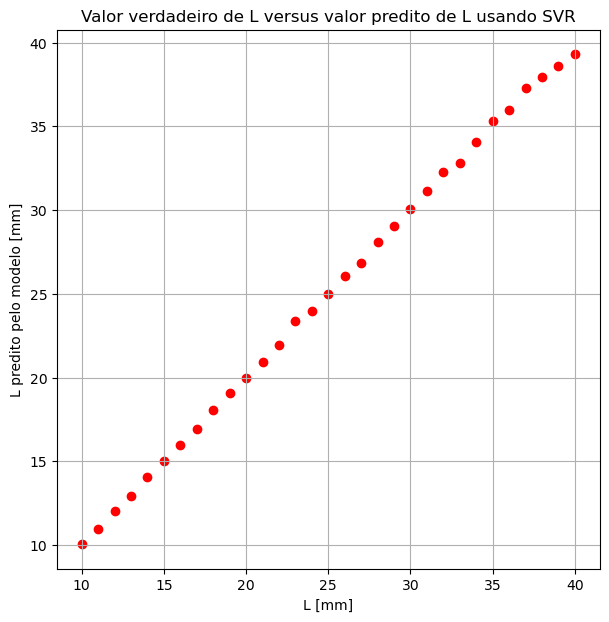

In [23]:
model_evaluation_grid(X_0, y_0, grid_0)

# Plots de L [mm] versus $f_{r}$ [GHz] para todos os valores de $\epsilon$

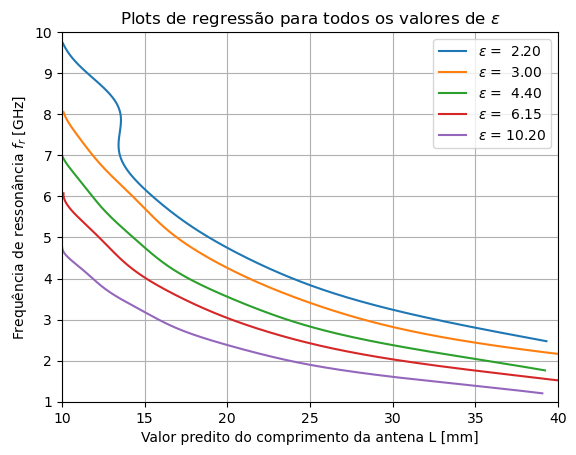

In [24]:
plt.figure()

plt.plot(grid_0.predict(np.arange(min_freq_0, max_freq_0, 0.001).reshape(-1,1)), np.arange(min_freq_0, max_freq_0, 0.001))
plt.plot(grid_1.predict(np.arange(min_freq_1, max_freq_1, 0.001).reshape(-1,1)), np.arange(min_freq_1, max_freq_1, 0.001))
plt.plot(grid_2.predict(np.arange(min_freq_2, max_freq_2, 0.001).reshape(-1,1)), np.arange(min_freq_2, max_freq_2, 0.001))
plt.plot(grid_3.predict(np.arange(min_freq_3, max_freq_3, 0.001).reshape(-1,1)), np.arange(min_freq_3, max_freq_3, 0.001))
plt.plot(grid_4.predict(np.arange(min_freq_4, max_freq_4, 0.001).reshape(-1,1)), np.arange(min_freq_4, max_freq_4, 0.001))
plt.title('Plots de regressão para todos os valores de $\epsilon$')
plt.xlabel('Valor predito do comprimento da antena L [mm]')
plt.ylabel('Frequência de ressonância $f_{r}$ [GHz]')
plt.xlim([10, 40])
plt.ylim([1, 10])
plt.legend(['$\epsilon$ =  2.20',
            '$\epsilon$ =  3.00',
            '$\epsilon$ =  4.40',
            '$\epsilon$ =  6.15',
            '$\epsilon$ = 10.20'])
plt.grid('on')


---

# Algumas metricas

## $R^{2}$ Score

### O modelo linear explica 99,97% da variância da variável dependente a partir dos regressores (variáveis independentes) incluídas naquele modelo.

In [28]:
r2_score(y_test_0, grid_0.predict(X_test_0))

0.9936547577811283

## MAE (Mean Absolute Error)

In [29]:
mean_absolute_error(y_test_0, grid_0.predict(X_test_0))

0.2638850351542677

## MSE (Mean Squared Error)

In [30]:
mean_squared_error(y_test_0, grid_0.predict(X_test_0))

0.11499132837465476

## MAPE (Mean Absolute Percentage Error)

In [31]:
mean_absolute_percentage_error(y_test_0, grid_0.predict(X_test_0))

0.007292557215657317

## MeAE (Median Absolute Error)

In [32]:
median_absolute_error(y_test_0, grid_0.predict(X_test_0))

0.24448635500412053

## AES (Absolute Error Score)

In [34]:
d2_absolute_error_score(y_test_0, grid_0.predict(X_test_0))

0.926112190156805

## MSLE (Mean Squared Log Error)

In [35]:
mean_squared_log_error(y_test_0, grid_0.predict(X_test_0))

7.635235540534308e-05

## Tweedie Score

In [36]:
d2_tweedie_score(y_test_0, grid_0.predict(X_test_0))

0.9936547577811283

## Pinball Score

In [37]:
d2_pinball_score(y_test_0, grid_0.predict(X_test_0))

0.926112190156805

## MA (Max Error)

In [38]:
max_error(y_test_0, grid_0.predict(X_test_0))

0.6991816020528532